# Music recommender (Item Based Collaborative Filtering Engine)

### Data cleaning and examination

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import re
import csv
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [2]:
#load data
df=pd.read_csv('/Users/jeffreyng/Music_Rec_Engine/Music-Recommender-Engine/output-data.csv')

In [3]:
#looking at data
df.artist.value_counts()[0:20]

Neil Young               27
Bonnie “Prince” Billy    22
Animal Collective        21
Guided by Voices         20
David Bowie              19
Gucci Mane               19
Prince                   18
Of Montreal              17
Brian Eno                17
R.E.M.                   17
The Beatles              17
Lil Wayne                17
The Mountain Goats       16
Deerhoof                 16
Sonic Youth              16
Mogwai                   16
Robert Pollard           16
Future                   15
Stereolab                15
The Fall                 15
Name: artist, dtype: int64

In [4]:
#replace nan with misc.
df.genre.replace(np.nan, 'Misc', inplace=True)

In [5]:
#looking at genre breakdown
df.genre.value_counts()

Rock            6879
Electronic      3659
Experimental    1669
Rap             1644
Pop/R&B         1298
Misc            1289
Metal            762
Folk/Country     748
Jazz             282
Global           162
none              11
Name: genre, dtype: int64

In [6]:
#replacing None with Misc 
df.genre.replace('none', 'Misc', inplace=True)

Text(0.5, 1.0, 'Genres of Albums in Dataset')

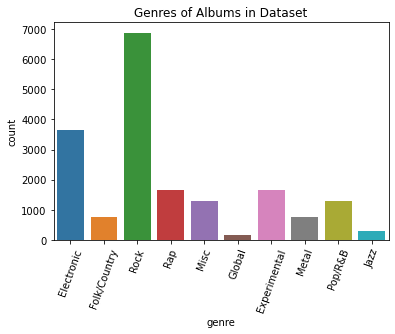

In [131]:
#preliminary EDA showing genres in data
sns.countplot(x=df.genre, orient= 'h')
plt.xticks(rotation=70)
plt.title('Genres of Albums in Dataset')
# plt.savefig('genres_of_albums.png')

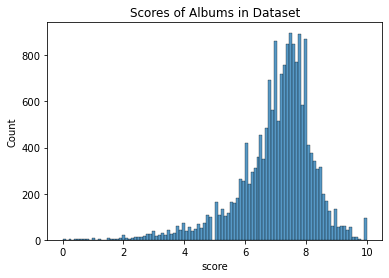

In [9]:
#showing rating data
sns.histplot(data=df.score)
plt.title('Scores of Albums in Dataset')
# plt.savefig('scores_of_albums.png')

### Now we will build our rec engine

In [11]:
#importing surprise package
import surprise

In [115]:
#making our data 
from surprise import Dataset, Reader
reader= Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['artist','album', 'score']], reader)

In [116]:
#TTS
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [117]:
#using SVD algo and fitting train data
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [118]:
#making predictions on test_Set
predictions = algo.test(testset)

In [119]:
# getting RMSE 
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.2117


1.2116736922976643

In [120]:
#looking at predictions data
predictions[:][:][3]

Prediction(uid='Blur', iid='The Magic Whip', r_ui=7.0, est=7.679449634551391, details={'was_impossible': False})

In [121]:
predictions[:][:][1]

Prediction(uid='Snoop Dogg', iid='Doggumentary', r_ui=5.5, est=6.651534499441084, details={'was_impossible': False})

In [122]:
#converting predictions into a df
df1= pd.DataFrame(predictions[:])

In [123]:
df1.loc[2779]

uid                   Ellie Goulding
iid                           Lights
r_ui                             6.8
est                         6.999477
details    {'was_impossible': False}
Name: 2779, dtype: object

In [128]:
#function that pulls in an album name and returns top 10 similar albums indices 
def rec_album():
    y=df1.loc[df1['iid'] == 'Lights'] #we enter our album name here
    container=[]
    for ele in list(df1.r_ui):
        container.append(abs(int(y.r_ui) - ele)) #looking at album ratings difference between prediction and actual 
        #finding the most similar
        
    sim= pd.Series(container) #converting list of albums into series
    sorted_sim= sim.sort_values()[0:10] #sorting series and returning top 10
    print(sorted_sim) #printout
    return sorted_sim #top ten sorted


In [129]:
# returning album indices of recommended albums to 'Beat Happening'
rec_album()
# we can then use df1.loc[index] to find our actual album

0       0.0
2106    0.0
2107    0.0
147     0.0
152     0.0
584     0.0
165     0.0
567     0.0
2768    0.0
972     0.0
dtype: float64


0       0.0
2106    0.0
2107    0.0
147     0.0
152     0.0
584     0.0
165     0.0
567     0.0
2768    0.0
972     0.0
dtype: float64

In [130]:
df1.loc[2106]

uid                     Gang of Four
iid                  Return the Gift
r_ui                             6.0
est                         7.081541
details    {'was_impossible': False}
Name: 2106, dtype: object